In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

from pmdarima.arima import auto_arima
from pmdarima.arima import ARIMA

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'statsmodels'

In [2]:
df = pd.read_csv(r"Datos Completos\Octubre-Abril.csv", sep= "\t", parse_dates=["PoC AB12"], dayfirst=True)
df.columns = ["Date","Pax"]
df = df.iloc[4:,:].reset_index(False)
df = df.drop("index", axis=1)

df["Date"] = pd.to_datetime(df["Date"],  format="%d-%m-%Y %H:%M:%S")
df["Pax"] = pd.to_numeric(df["Pax"])

df["month"] = df["Date"].dt.month
df["month"] = df["Date"].dt.month
df["Hour"] = df["Date"].dt.hour
df["Day"] = df["Date"].dt.day
df["Year"] = df["Date"].dt.year

df = df.groupby(["Hour","month","Day","Year"])[["Pax"]].max().reset_index()

""" eliminamos cualquier detección fuerea de las horas laborales de la oficina"""

df.loc[df['Hour'] == 0, 'Pax'] = 0
df.loc[df['Hour'] == 1, 'Pax'] = 0
df.loc[df['Hour'] == 2, 'Pax'] = 0
df.loc[df['Hour'] == 3, 'Pax'] = 0
df.loc[df['Hour'] == 4, 'Pax'] = 0
df.loc[df['Hour'] == 5, 'Pax'] = 0
df.loc[df['Hour'] == 6, 'Pax'] = 0
df.loc[df['Hour'] == 20, 'Pax'] = 0
df.loc[df['Hour'] == 21, 'Pax'] = 0
df.loc[df['Hour'] == 22, 'Pax'] = 0
df.loc[df['Hour'] == 23, 'Pax'] = 0

""" separación de datos por meses"""

df4 = df.loc[df.loc[:,"month"]==4]
df3 = df.loc[df.loc[:,"month"]==3]
df2 = df.loc[df.loc[:,"month"]==2]
df1 = df.loc[df.loc[:,"month"]==1]
df12 = df.loc[df.loc[:,"month"]==12]
df11 = df.loc[df.loc[:,"month"]==11]
df10 = df.loc[df.loc[:,"month"]==10]

""" inclusión de columna fecha con horas limpias"""

df41 = df4.drop("Pax", axis=1)
df31 = df3.drop("Pax", axis=1)
df21 = df2.drop("Pax", axis=1)
df01 = df1.drop("Pax", axis=1)
df121 = df12.drop("Pax", axis=1)
df111 = df11.drop("Pax", axis=1)
df101 = df10.drop("Pax", axis=1)

df41["Year","month","Day"] = pd.to_datetime(df41)
df31["Year","month","Day"] = pd.to_datetime(df31)
df21["Year","month","Day"] = pd.to_datetime(df21)
df01["Year","month","Day"] = pd.to_datetime(df01)
df121["Year","month","Day"] = pd.to_datetime(df121)
df111["Year","month","Day"] = pd.to_datetime(df111)
df101["Year","month","Day"] = pd.to_datetime(df101)

df4["Fecha"] = df41.iloc[:,4]
df3["Fecha"] = df31.iloc[:,4]
df2["Fecha"] = df21.iloc[:,4]
df1["Fecha"] = df01.iloc[:,4]
df12["Fecha"] = df121.iloc[:,4]
df11["Fecha"] = df111.iloc[:,4]
df10["Fecha"] = df101.iloc[:,4]

C:\Users\Victor\AppData\Local\Temp\ipykernel_788\3025548232.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(r"Datos Completos\Octubre-Abril.csv", sep= "\t", parse_dates=["PoC AB12"], dayfirst=True)
C:\Users\Victor\AppData\Local\Temp\ipykernel_788\3025548232.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["Fecha"] = df41.iloc[:,4]
C:\Users\Victor\AppData\Local\Temp\ipykernel_788\3025548232.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [117]:
# dfX = df.drop("Pax", axis=1)
# dfX["Year","month","Day"] = pd.to_datetime(dfX)
# df["Fecha"] = dfX.iloc[:,4]


In [3]:
df

,Hour,month,Day,Year,Pax
0,0,1,2,2024,0
1,0,1,3,2024,0
2,0,1,4,2024,0
3,0,1,5,2024,0
4,0,1,6,2024,0
...,...,...,...,...,...
3537,23,12,26,2023,0
3538,23,12,27,2023,0
3539,23,12,28,2023,0
3540,23,12,29,2023,0


In [4]:
df4

,Hour,month,Day,Year,Pax,Fecha
50,0,4,1,2024,0,2024-04-01 00:00:00
51,0,4,2,2024,0,2024-04-02 00:00:00
52,0,4,3,2024,0,2024-04-03 00:00:00
53,0,4,4,2024,0,2024-04-04 00:00:00
54,0,4,5,2024,0,2024-04-05 00:00:00
...,...,...,...,...,...,...
3469,23,4,26,2024,0,2024-04-26 23:00:00
3470,23,4,27,2024,0,2024-04-27 23:00:00
3471,23,4,28,2024,0,2024-04-28 23:00:00
3472,23,4,29,2024,0,2024-04-29 23:00:00


In [53]:
df4 = df4[df4["Hour"]!=23]
df4

,Hour,month,Day,Year,Pax,Fecha
1084,7,4,1,2024,0,2024-04-01 07:00:00
1085,7,4,2,2024,0,2024-04-02 07:00:00
1086,7,4,3,2024,0,2024-04-03 07:00:00
1087,7,4,4,2024,0,2024-04-04 07:00:00
1088,7,4,5,2024,0,2024-04-05 07:00:00
...,...,...,...,...,...,...
2877,19,4,26,2024,1,2024-04-26 19:00:00
2878,19,4,27,2024,0,2024-04-27 19:00:00
2879,19,4,28,2024,0,2024-04-28 19:00:00
2880,19,4,29,2024,1,2024-04-29 19:00:00


In [54]:
dff4 = df4.iloc[:,4:6]
dff4

,Pax,Fecha
1084,0,2024-04-01 07:00:00
1085,0,2024-04-02 07:00:00
1086,0,2024-04-03 07:00:00
1087,0,2024-04-04 07:00:00
1088,0,2024-04-05 07:00:00
...,...,...
2877,1,2024-04-26 19:00:00
2878,0,2024-04-27 19:00:00
2879,0,2024-04-28 19:00:00
2880,1,2024-04-29 19:00:00


<Axes: xlabel='Fecha'>

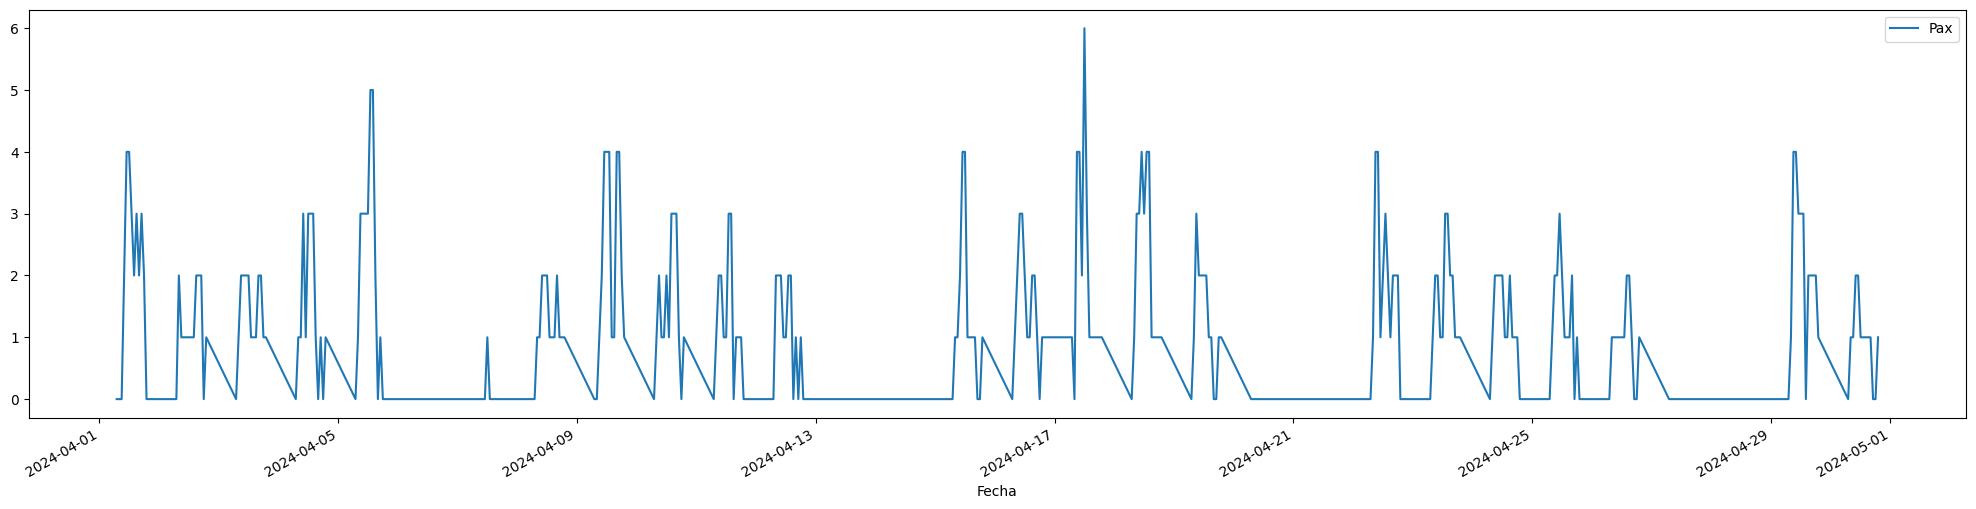

In [55]:
""" gráfico mostrando nº personas (multiplicado por 10 para mejor visualización) por cada dia de la semana (en horas)"""
dff4.groupby("Fecha")[["Pax"]].max().plot(figsize=(25,6))

In [89]:
X = dff4["Pax"].values
train = X[:300]
test = X[300:]

In [106]:
len(X)

390

In [90]:
len(train)

300

In [91]:
len(test)

90

In [92]:
""" no tenemos estacionalidad"""
adfuller(dff4["Pax"])

(-1.790725659070848,
 0.38507577063620835,
 16,
 373,
 {'1%': -3.448003816652923,
  '5%': -2.86931999731073,
  '10%': -2.5709145866785503},
 1047.6691045206148)

In [93]:
model = auto_arima(train,
                   start_p = 2,
                   start_q = 2,
                   start_d = 2,
                   max_p = 10,
                   max_q = 10,
                   max_d = 6,
                   trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=918.272, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1086.997, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1066.095, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=964.686, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1084.999, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=951.852, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=942.682, Time=0.39 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=917.793, Time=0.36 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=927.953, Time=0.14 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=927.647, Time=0.47 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=914.300, Time=0.41 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=945.430, Time=0.22 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=915.848, Time=0.46 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=910.016, Time=0.50 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=92

In [94]:
model = ARIMA(order=(7,1,3))
model.fit(train)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:               SARIMAX(7, 1, 3)   Log Likelihood                -432.155
Date:                Thu, 23 May 2024   AIC                            888.310
Time:                        20:36:42   BIC                            932.716
Sample:                             0   HQIC                           906.083
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0147      0.016      0.940      0.347      -0.016       0.045
ar.L1         -0.4204      0.060     -6.964      0.000      -0.539      -0.302
ar.L2         -1.0510      0.068    -15.454      0.0

In [95]:
model

ARIMA(order=(7, 1, 3))

In [96]:
pd.Series(train).to_csv("cosa.csv", index=None)

In [97]:
print(train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 0 0
 1 0 1 1 2 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 2 1 3 0 0 1 1 2 2 2 0 0
 1 2 4 3 3 0 0 4 2 2 2 1 0 0 4 1 2 1 2 3 3 0 0 2 2 1 2 2 0 0 2 3 4 3 2 0 0
 4 2 2 2 1 0 0 4 2 4 1 2 1 3 0 0 2 4 1 1 1 0 0 4 3 2 4 2 0 0 1 1 2 3 1 0 0
 3 2 4 1 2 3 3 0 1 2 4 2 1 1 0 0 4 2 6 3 2 0 0 2 1 2 2 1 0 0 3 1 3 1 1 3 5
 0 0 1 4 1 3 2 0 0 1 1 3 4 2 0 0 3 3 1 1 1 0 0 3 1 2 1 1 3 5 0 0 1 1 3 3 2
 0 0 1 1 1 4 1 0 0 2 3 1 1 2 0 0 0 1 3 2 1 1 2 0 0 1 1 3 0 0 0 0 1 2 1 1 1
 0 0 1 2 2 1 2 0 0 2 1 2 2 2 0 0 0 0 2 4 3 1 1 0 0 1 2 1 1 0 0 0 2 2 1 2 1
 0 0 2 1]


In [98]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:               SARIMAX(7, 1, 3)   Log Likelihood                -432.155
Date:                Thu, 23 May 2024   AIC                            888.310
Time:                        20:36:48   BIC                            932.716
Sample:                             0   HQIC                           906.083
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0147      0.016      0.940      0.347      -0.016       0.045
ar.L1         -0.4204      0.060     -6.964      0.000      -0.539      -0.302
ar.L2         -1.0510      0.068    -15.454      0.0

In [99]:
model.predict(5)

array([1.19142803, 1.62257413, 1.02815489, 0.33167336, 1.30895478])

In [109]:
model.predict(90).astype(int).tolist()

[1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

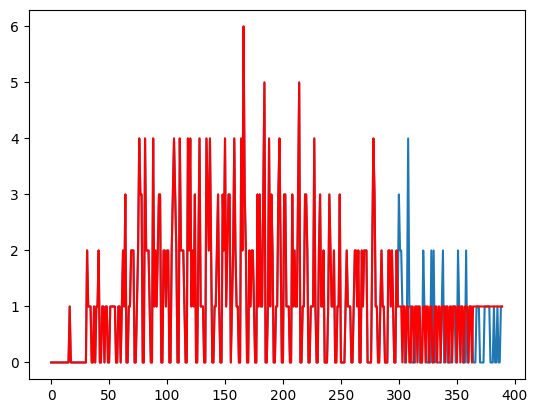

In [113]:
plt.plot(train.tolist() + test.tolist())
plt.plot(train.tolist()  + model.predict(90).astype(int).tolist(),color='red');

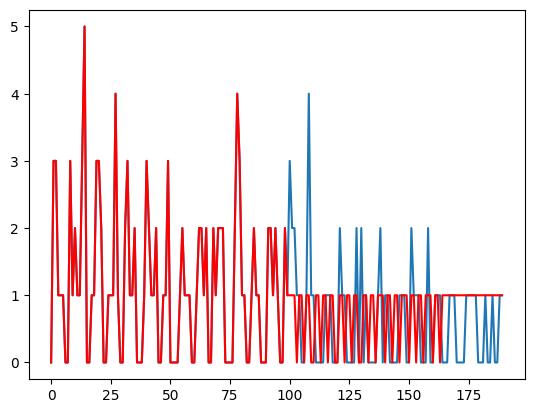

In [111]:
plt.plot(train.tolist()[-100:] + test.tolist())
plt.plot(train.tolist()[-100:]  + model.predict(90).astype(int).tolist(),color='red');

In [116]:
predictions = model.predict(90)
print("R2_score:", r2_score(test, predictions))

R2_score: -0.6108501312572436


In [101]:
predictions

array([1.19142803, 1.62257413, 1.02815489, 0.33167336, 1.30895478,
       1.44008436, 0.70976329, 1.15148437, 1.64586942, 0.79687237,
       0.73743732, 1.57454921, 1.17674494, 0.65417953, 1.4105327 ,
       1.47557102, 0.67483451, 1.07785495, 1.62750512, 0.91621822,
       0.82667801, 1.60006725, 1.23046038, 0.69342953, 1.38614933,
       1.50626023, 0.76218118, 1.10548347, 1.64400892, 0.98955089,
       0.8610686 , 1.59271543, 1.28742817, 0.75986438, 1.38982535,
       1.54035101, 0.83739986, 1.12223039, 1.65337474, 1.06143128,
       0.90423168, 1.59301116, 1.34227829, 0.82347096, 1.39344637,
       1.57107149, 0.91108366, 1.14367246, 1.66428226, 1.13031022,
       0.94836726, 1.5946653 , 1.39388152, 0.88689527, 1.40055178,
       1.6005694 , 0.98265626, 1.16772191, 1.67543753, 1.19611926,
       0.99393606, 1.59853906, 1.44290202, 0.94982227, 1.41052789,
       1.62875895, 1.05210366, 1.19430702, 1.68717652, 1.25911538,
       1.04065663, 1.60449695, 1.48951155, 1.01212812, 1.42324

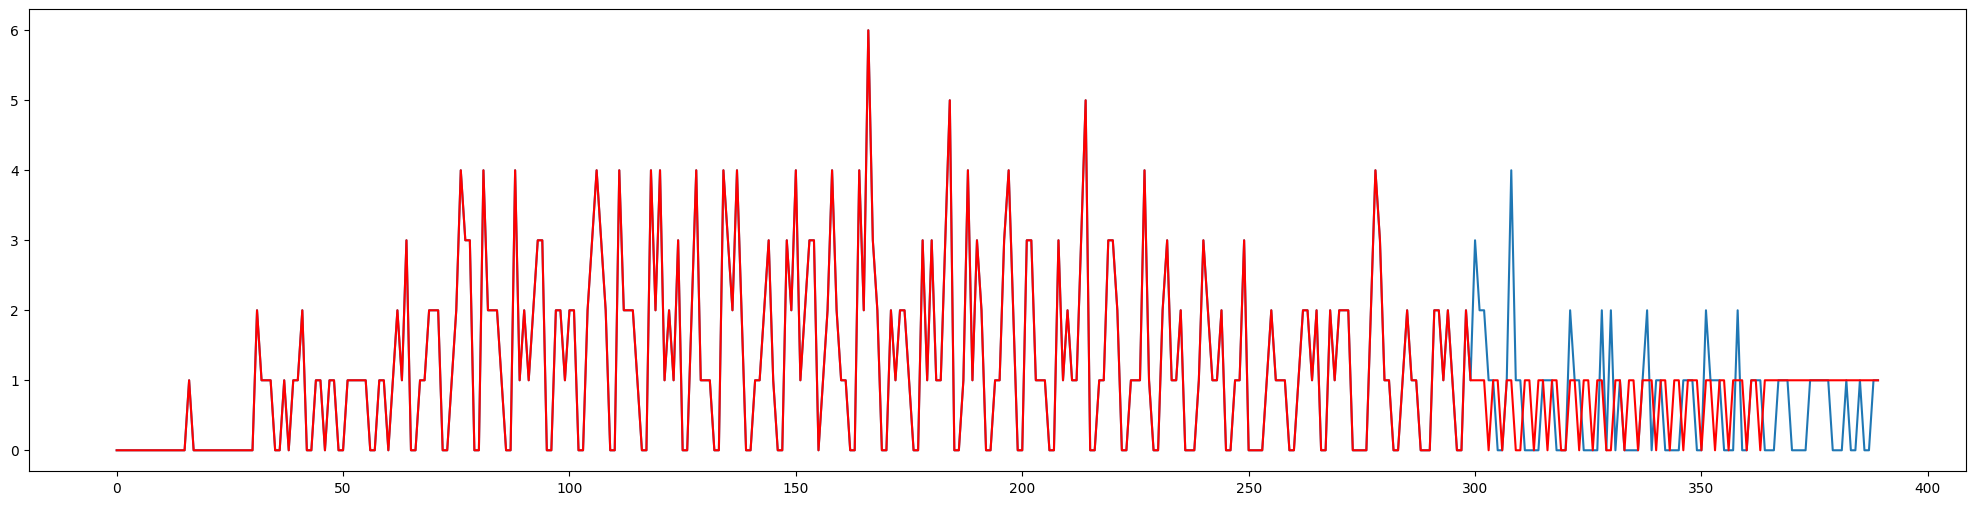

In [121]:
plt.figure(figsize=(25,6))
plt.plot(train.tolist() + test.tolist())
plt.plot(train.tolist() + model.predict(90).astype(int).tolist(),color='red');

TypeError: function takes exactly 0 arguments (1 given)

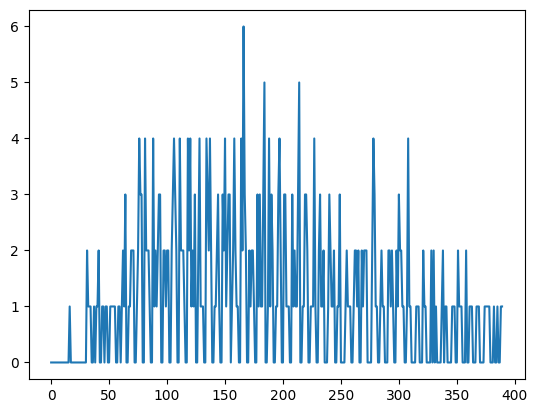

In [120]:
plt.plot(train.tolist() + test.tolist())
plt.plot(train.tolist()  + predictions.tolist(90).astype(int).tolist(),color='red');